In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [2]:
m = 100
r = 0.2
A = np.pi * r**2  # cross-sectional area
Cd = 0.47  # the dimensionless air-drag coefficient
g = 9.8  # the gravitational accelation on the surface of Earth (in m/s**2)
rhoa = 1.  # the air density (in kg/m**3)
c2 = 0.5*Cd*rhoa*A

In [3]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*np.sqrt((y2+vw)**2+y4**2), y4, a+b*y4*np.sqrt((y2+vw)**2+y4**2)]
    return dydt

In [4]:
t_start = 0
t_end = 120
n = 10000
t = np.linspace(t_start, t_end, n)

a = -g
b = -c2/m
wind = 26.8224  # speed, converted to m/s

Required ground speed is 203.567mph to hit the target.
The planes speed must be within 24.383mph to hit within 100m
The trailing side is linear due to the bomb hitting terminal velocity. The wind is completely horizontal, so it does not change the vertical velocity.


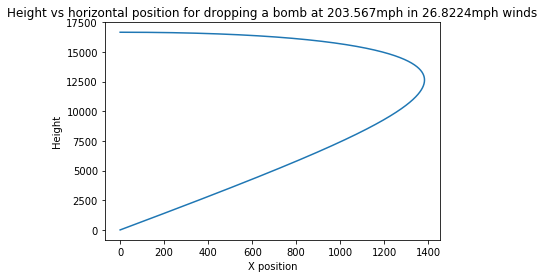

In [5]:
speed = 0
r = []
found_hit = False
while True:
    y0 = [0, speed, 50000/3, 0]  # x, Vx, y, Vy initial conditions
    x, vx, y, vy  = odeint(dy_dt, y0, t, args=(a, b, wind)).T
    fx = interp1d(y, x)
    hit_location = fx(0)
    if hit_location >= 0 and not found_hit:
        found_hit = True
        print(f"Required ground speed is {round(speed*2.237, 3)}mph to hit the target.")
        plt.plot(x[x>=0], y[x>=0])
        plt.title(f"Height vs horizontal position for dropping a bomb at {round(speed*2.237, 3)}mph in {wind}mph winds")
        plt.xlabel("X position")
        plt.ylabel("Height")

    if hit_location >= -100 and len(r) == 0:
        r.append(speed)
    if hit_location >= 100 and len(r) == 1:
        r.append(speed)
        print(f"The plane's speed must be within {round((r[1]-r[0])*2.237, 3)}mph to hit within 100m")
        break
        
    speed += .1
    
print("The trailing side is linear due to the bomb hitting terminal velocity. \
The wind is completely horizontal, so it does not change the vertical velocity.")